## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mice_count = len(mice_df['Mouse ID'].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df.duplicated(subset=['Mouse ID', 'Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df2 = mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
mice_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mice_df2['Mouse ID'].unique())
num_mice

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tvol_mean = mice_df2['Tumor Volume (mm3)'].mean()
tvol_mean

50.44841133656781

In [13]:
tvol_median = mice_df2['Tumor Volume (mm3)'].median()
tvol_median

48.951421075

In [14]:
tvol_var = mice_df2['Tumor Volume (mm3)'].var()
tvol_var

79.29460645419073

In [15]:
tvol_stdev = mice_df2['Tumor Volume (mm3)'].std()
tvol_stdev

8.904751903011713

In [16]:
tvol_sem = mice_df2['Tumor Volume (mm3)'].sem()
tvol_sem

0.20493721451485938

In [17]:
summ_tbl1 = pd.DataFrame({'Mean': tvol_mean,
                            'Median': tvol_median,
                            'Varience': tvol_var,
                            'Std. Deviation': [tvol_stdev],
                            'SEM': tvol_sem})
summ_tbl1

,Mean,Median,Varience,Std. Deviation,SEM
0,50.448411,48.951421,79.294606,8.904752,0.204937


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_reg = mice_df2['Drug Regimen'].unique()
drug_reg

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [19]:
tvol2 = mice_df2.groupby(['Drug Regimen'])
tvol_mean2  = tvol2['Tumor Volume (mm3)'].mean()
tvol_mean2

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
mice_df22 = mice_df2.rename(columns={'Tumor Volume (mm3)': 'TV2'})
mice_df22


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TV2,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
tvol22 = mice_df22.groupby(['Drug Regimen'])
tvol_median22 = tvol22['TV2'].median()
tvol_median22

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: TV2, dtype: float64

In [22]:
mice_df23 = mice_df2.rename(columns={'Tumor Volume (mm3)': 'TV3'})
mice_df23

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TV3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
tvol23 = mice_df23.groupby(['Drug Regimen'])
tvol_var23 = tvol23['TV3'].var()
tvol_var23

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: TV3, dtype: float64

In [24]:
mice_df24 = mice_df2.rename(columns={'Tumor Volume (mm3)': 'TV4'})
mice_df24

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TV4,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
tvol24 = mice_df24.groupby(['Drug Regimen'])
tvol_stdev24 = tvol24['TV4'].std()
tvol_stdev24

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: TV4, dtype: float64

In [26]:
mice_df25 = mice_df2.rename(columns={'Tumor Volume (mm3)': 'TV5'})
mice_df25

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TV5,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
tvol25 = mice_df25.groupby(['Drug Regimen'])
tvol_sem25 = tvol25['TV5'].sem()
tvol_sem25

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: TV5, dtype: float64

In [28]:
summ_tbl2 = pd.concat([tvol_mean2, tvol_median22, tvol_var23, tvol_stdev24, tvol_sem25], axis=1)
summ_tbl2 = summ_tbl2.rename(columns={'Tumor Volume (mm3)': 'Tumor Vol Mean', 
                                      'TV2': 'Tumor Vol Median',
                                      'TV3': 'Tumor Vol Varience',
                                     'TV4': 'Tumor Vol Std. Deviation',
                                    'TV5': 'Tumor Vol Sem'})
summ_tbl2

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Varience,Tumor Vol Std. Deviation,Tumor Vol Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_group = mice_df2.groupby('Drug Regimen')
mice_ct = mice_group['Mouse ID'].count()
mice_ct

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

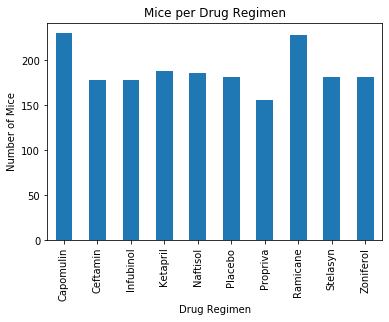

In [30]:
mice_ct.plot.bar()
plt.title('Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

In [31]:
mice_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = mice_df2.groupby('Sex')
mice_gender_ct = mice_gender['Mouse ID'].count()
mice_gender_ct

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Mice Count')

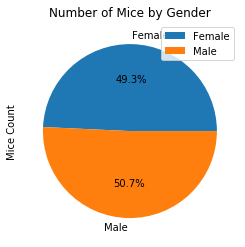

In [33]:
gender_pie = mice_gender_ct.plot.pie(y='Sex', title='Number of Mice by Gender', autopct='%1.1f%%', legend=True)
gender_pie.set_ylabel('Mice Count')



In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regi4 = mice_df2.loc[(mice_df2['Drug Regimen'] == 'Capomulin') | (mice_df2['Drug Regimen'] == 'Ramicane') | (mice_df2['Drug Regimen'] == 'Infubinol') | (mice_df2['Drug Regimen'] == 'Ceftamin'), :]
regi4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [46]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final4_time = regi4.loc[(regi4['Timepoint'] == 45), ['Drug Regimen', 'Tumor Volume (mm3)']]
final4_time



,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
49,Ramicane,29.128472
...,...,...
1797,Ceftamin,61.386660
1813,Infubinol,67.685569
1845,Ceftamin,68.594745
1855,Ceftamin,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
plot_mice = []

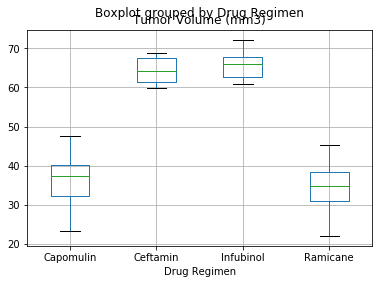

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
plt.suptitle('Final Tumor Volume')
final4_time.boxplot(column=['Tumor Volume (mm3)'], by='Drug Regimen', ax=ax)

## Line and Scatter Plots

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_reg = mice_df2.loc[(mice_df2['Drug Regimen'] == 'Capomulin'), ['Timepoint', 'Tumor Volume (mm3)']]
capo_reg

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
...,...,...
440,45,47.685963
1452,0,45.000000
1453,5,45.597064
1454,10,46.059608


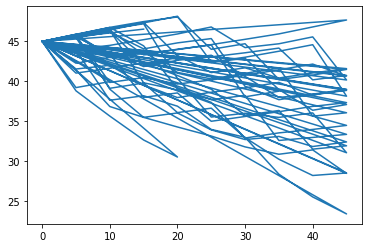

In [66]:
capo_time = capo_reg['Timepoint']
capo_tumor= capo_reg['Tumor Volume (mm3)']
capo_line = plt.plot(capo_time, capo_tumor, label='Capomulin Tumor Volume Over Time')


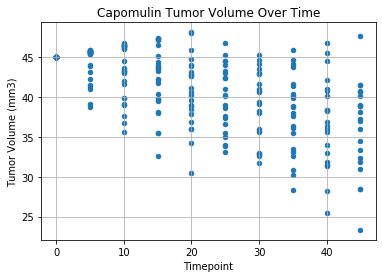

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_reg.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)', grid=True, title='Capomulin Tumor Volume Over Time')
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_reg2 = mice_df2.loc[(mice_df2['Drug Regimen'] == 'Capomulin'), ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capo_reg2

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [71]:
avg_capo = capo_reg2.groupby('Mouse ID').mean()
avg_capo

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


<function matplotlib.pyplot.show(*args, **kw)>

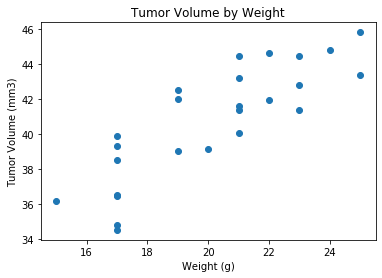

In [77]:
plt.scatter(avg_capo.iloc[:,0], avg_capo.iloc[:,1])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Weight')
plt.show